<a href="https://colab.research.google.com/github/jhonDataScience/Financiero/blob/main/Salario_de_Adultos_Analasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

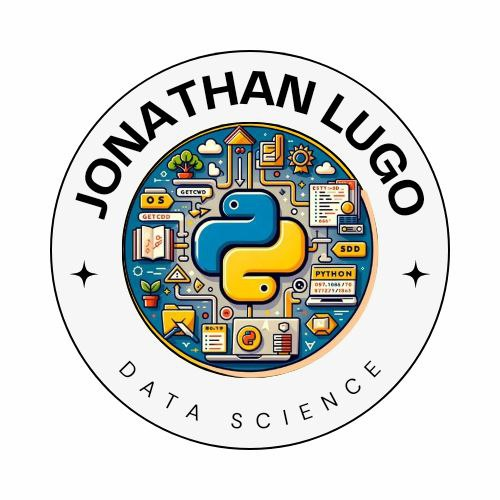

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
!ls "/content/drive/My Drive/Colab Notebooks"
# Check if the file exists
if os.path.exists('/content/drive/My Drive/Colab Notebooks/adult.csv'):
    print("File exists!")
else:
    print("File not found. Please check the file path and ensure the file is present in Google Drive.")

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/adult.csv'

df = pd.read_csv(file_path)

ls: cannot access '/content/drive/My Drive/Colab Notebooks': No such file or directory
File not found. Please check the file path and ensure the file is present in Google Drive.
Mounted at /content/drive


In [2]:
print('# Tamaño del Archivo')
# Use the correct file path
file_size = os.path.getsize('/content/drive/My Drive/Colab Notebooks/adult.csv')
print('adult.csv'.ljust(30) + str(round(file_size / 1000000, 2)) + 'MB')


# Tamaño del Archivo
adult.csv                     4.1MB


In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df[df == '?'] = np.nan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
# ************* METRICS ****************************

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**Analisis:**

*   La edad mínima y máxima de las personas en el conjunto de datos es de 17 y 90 años respectivamente, mientras que la edad promedio es de 37.

*   El mínimo y máximo de años dedicados a la educación es de 1 y 16 respectivamente, mientras que el nivel de educación promedio es de 10 años.

*   Si bien la ganancia de capital mínima y promedio es 0, la máxima es 99999. Esto parece extraño, tal vez se trate de algún error en la recopilación de datos.

*   El número de horas dedicadas por semana varía entre 1 y 99 y el promedio es de 40 horas.

# Tarea de predicción, determinar si una persona gana más de 50.000 dólares al año.

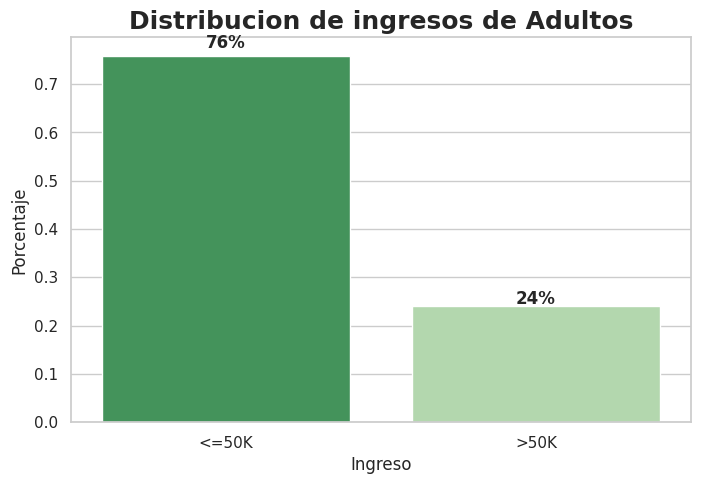

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Distribucion de ingresos de Adultos', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('Ingreso').reset_index(name = 'Porcentaje')

ax = sns.barplot(x = 'Ingreso', y = 'Porcentaje', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

**Analisis:**

*   Lo muy obvio la cantidad de personas que ganan más de 50.000 dólares al año es un tercio de las personas que ganan menos.
*   Tener en cuenta que estos datos se recopilaron en 1996, por lo que los 50.000 dólares de esa época podrían no ser lo mismo en la actualidad.



In [20]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

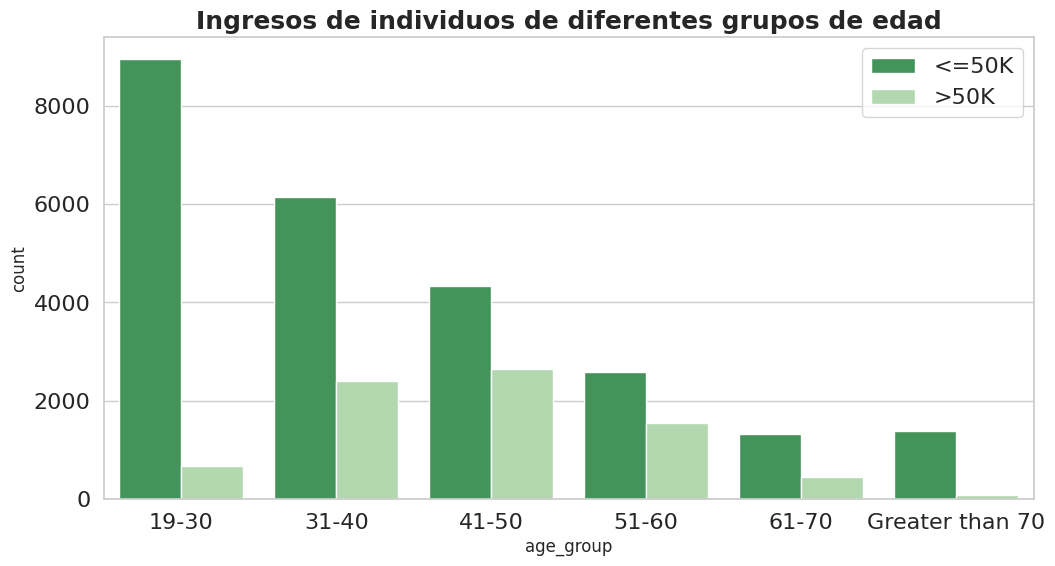

In [28]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
df_melted = df.melt(id_vars=['age_group'], value_vars=['income'])
sns.countplot(data=df_melted, x='age_group', hue='value', palette='Greens_r', order=order_list)
plt.title('Ingresos de individuos de diferentes grupos de edad', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Analsis**


*   Aqui vemos algo interesante, la cantidad de personas que ganan más de 50.000 dólares aumenta a medida que aumenta la edad hasta cierto punto.

*   Como se puede imaginar, la cantidad de personas que ganan más de 50.000 dólares es bastante insignificante entre las personas de entre 19 y 30 años.

*   En el caso de las personas de entre 41 y 50 años y de entre 51 y 60 años, la cantidad de personas que ganan más de 50.000 dólares es bastante comparable a la de las que ganan menos.

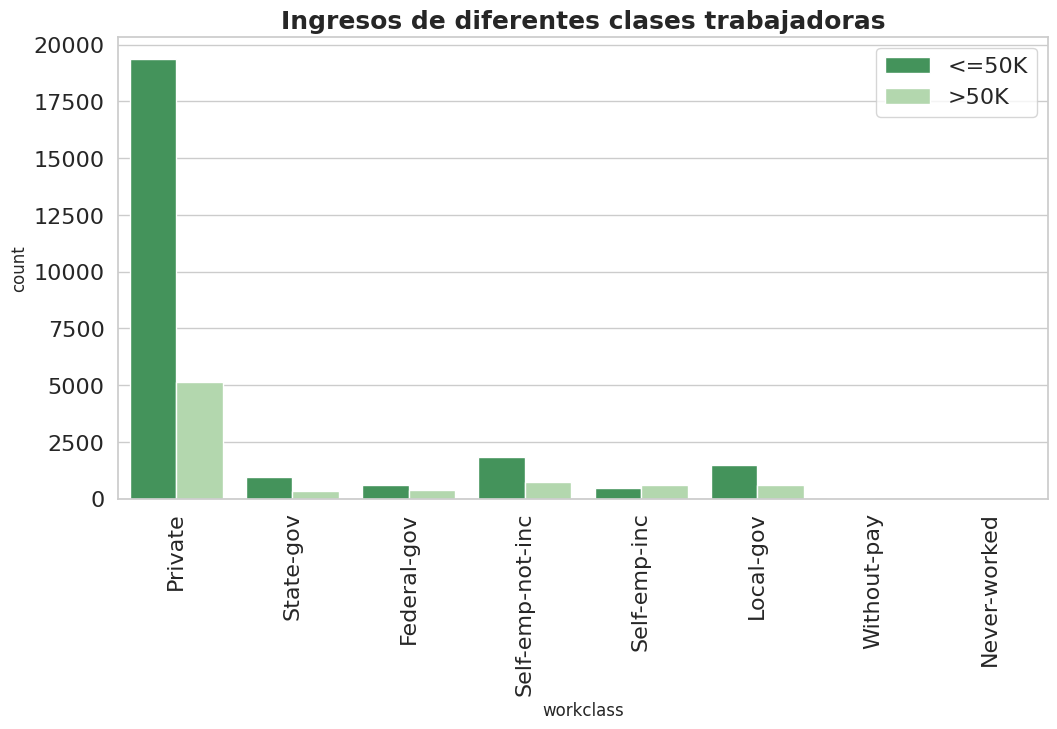

In [27]:
plt.figure(figsize=(12,6))
df_melted = df.melt(id_vars=['workclass'], value_vars=['income'])
sns.countplot(data=df_melted, x='workclass', hue='value', palette='Greens_r')
plt.title('Ingresos de diferentes clases trabajadoras', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Analisis:**

1.- En el gráfico anterior, hemos segregado los ingresos de los adultos en función de sus diferentes clases trabajadoras.

2.- Es bastante interesante ver que los autónomos(Private) son la única categoría en la que el número de personas que ganan más de 50.000 dólares supera a los que ganan menos. Podría ser útil sugerir que cuando se gestiona un negocio propio, una empresa nueva, etc., es más probable que se ganen más si tiene éxito.

3.- Las personas que trabajan en el sector privado se enfrentan a una diferencia significativa entre sus salarios, ya que más del 75% de ellas ganan menos de 50.000 dólares al año.

4.- Hay una diferencia muy pequeña entre el número de personas cuyos ingresos son más o menos de 50.000 dólares al año que trabajan para el Gobierno Federal.
5.- Las personas que pertenecen a la categoría Sin sueldo y Nunca han trabajado apenas contienen datos en ambas categorías.

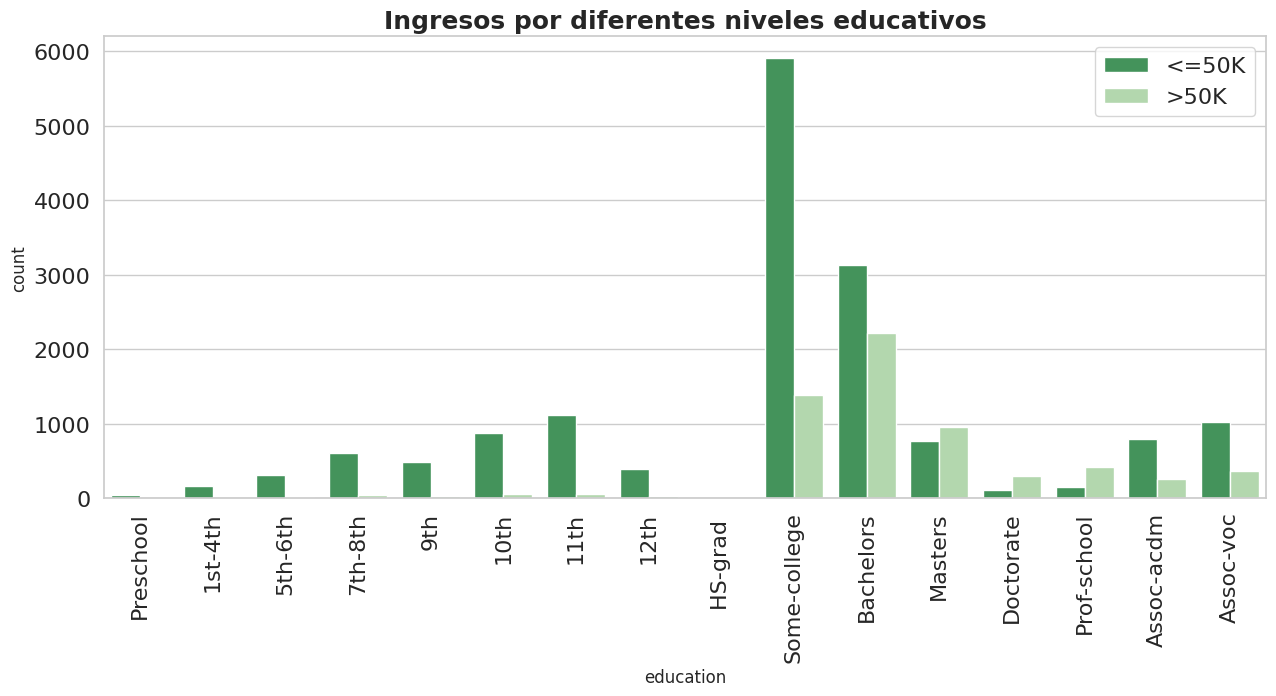

In [31]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']

df_melted = df.melt(id_vars=['education'], value_vars=['income'])

sns.countplot(data=df_melted, x='education', hue='value', palette='Greens_r', order= order_list)

plt.title('Ingresos por diferentes niveles educativos', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Podemos sacar algunas conclusiones importantes de este gráfico.**

**1**.- En el caso de las personas que han completado su educación hasta el 12.º grado, terminan ganando menos de 50.000 dólares.

**2**.- En el caso de las personas que pertenecen a la categoría de licenciatura, maestría, doctorado y escuela profesional en el nivel educativo, hay más personas que ganan más de 50.000 dólares al año que las que ganan menos.

**3**.- En el caso de los títulos académicos o profesionales, ¡hay algunas personas que ganan más de 50.000 dólares al año!

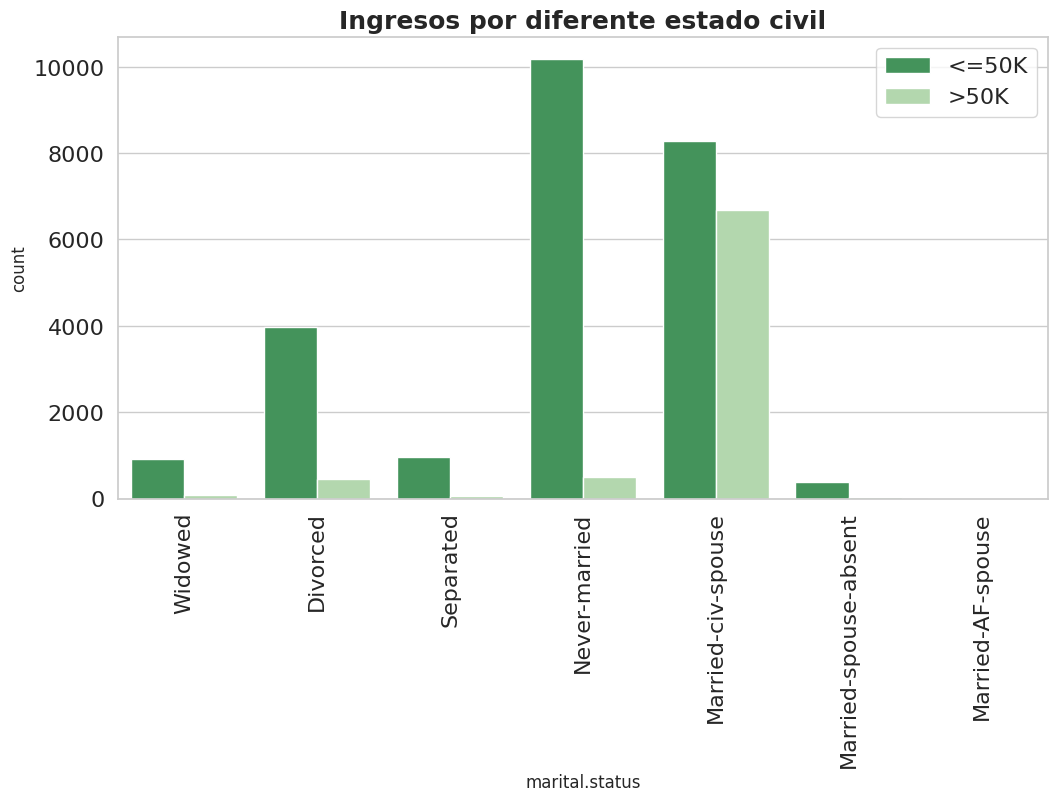

In [33]:
plt.figure(figsize=(12,6))

df_melted = df.melt(id_vars=['marital.status'], value_vars=['income'])

sns.countplot(data=df_melted, x='marital.status', hue='value', palette='Greens_r')
plt.title('Ingresos por diferente estado civil', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

*   Una cosa que hay que tener en cuenta aquí es que la categoría de
casados-cónyuges civiles es la única que tiene un número comparable de personas que pertenecen a ambas categorías.

*   En el resto, hay menos del 25% de los adultos que ganan más de 50.000 dólares al año.


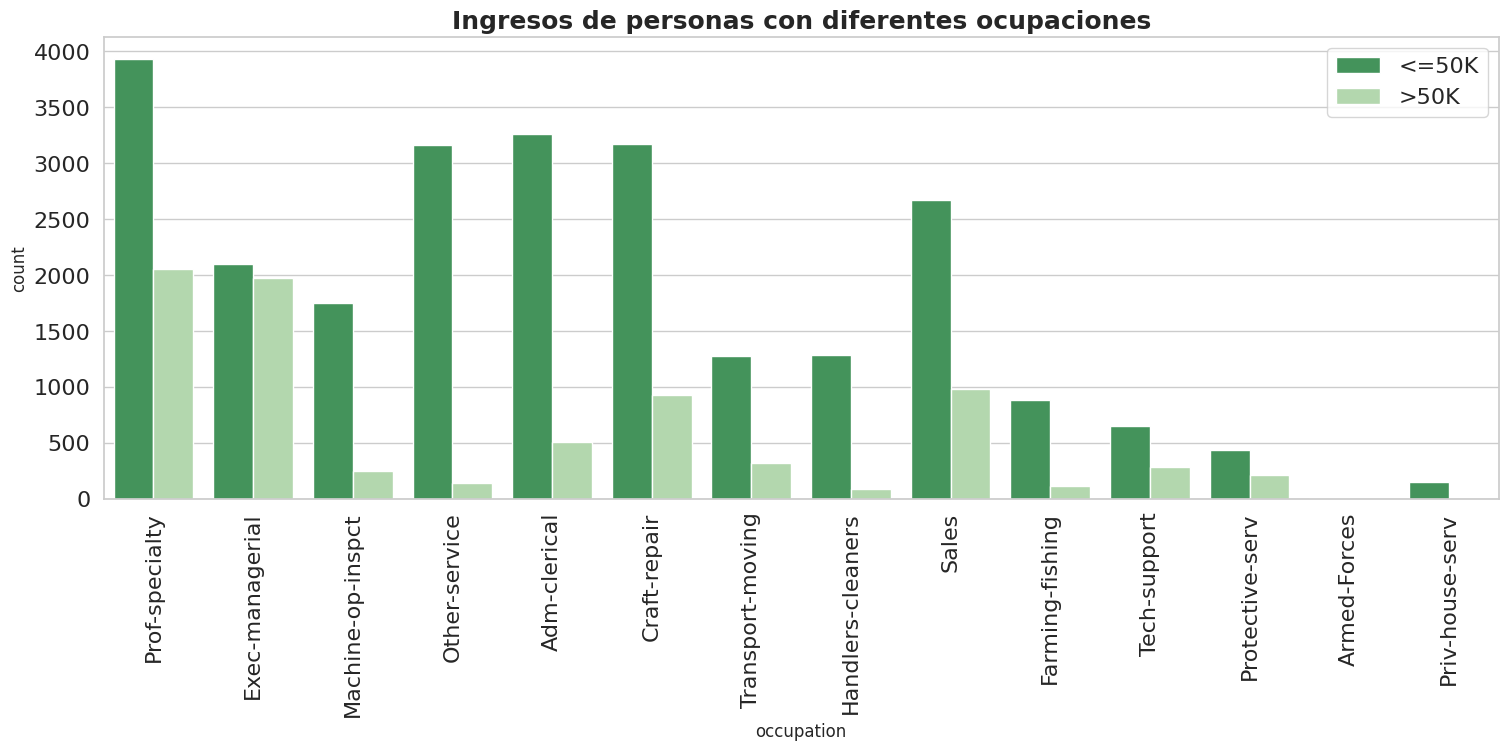

In [36]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

df_melted = df.melt(id_vars=['occupation'], value_vars=['income'])

sns.countplot(data=df_melted, x='occupation', hue='value', palette='Greens_r') # Use the melted dataframe here
plt.title('Ingresos de personas con diferentes ocupaciones', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Algunos puntos a tener en cuenta:**

*   Los adultos que ocupan puestos de dirección ejecutiva tienen la misma probabilidad de ganar más de 50.000 dólares al año.
*   Hay cerca de un 33 % de probabilidad de que un adulto con una especialidad profesional gane más de 50.000 dólares al año.
*   Los adultos que trabajan en agricultura y pesca, operaciones de maquinaria e inspección, otros servicios, administración y oficina, transporte y mudanzas tienen muy pocas probabilidades de ganar más de 50.000 dólares al año.
*   Alrededor del 25 % de las personas que trabajan en ventas ganan más de 50.000 dólares al año.

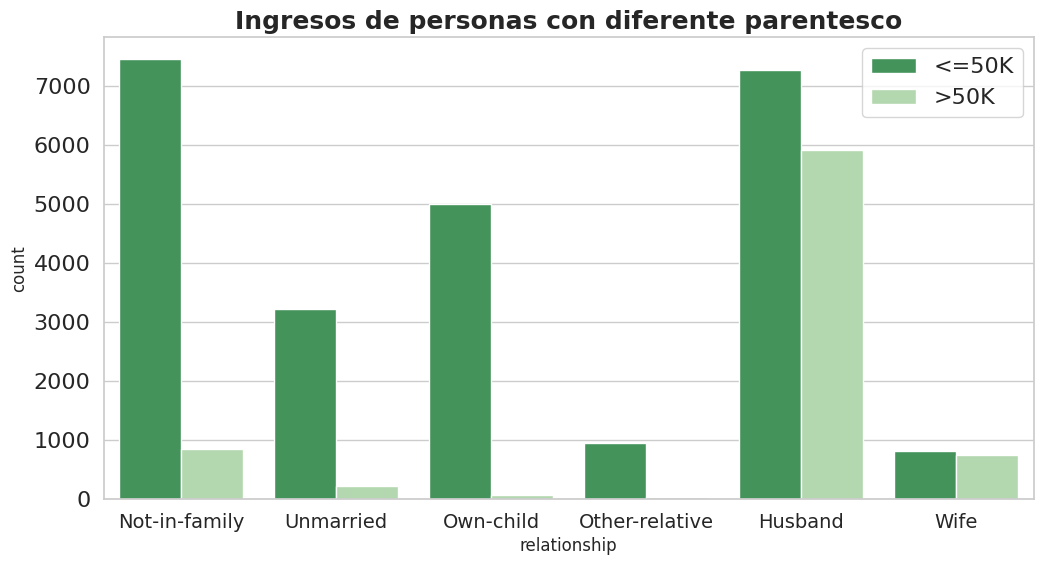

In [39]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

df_melted = df.melt(id_vars=['relationship'], value_vars=['income'])

sns.countplot(data=df_melted, x='relationship', hue='value', palette='Greens_r')
plt.title('Ingresos de personas con diferente parentesco', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

*   Las esposas tienen la misma probabilidad de ganar más de 50.000 dólares al año.
*   En el caso de los esposos, aunque el número es significativo, existe una menor posibilidad de que ganen más de 50.000 dólares al año.
*   Solo hay un puñado de personas solteras que ganan más de 50.000 dólares al año.

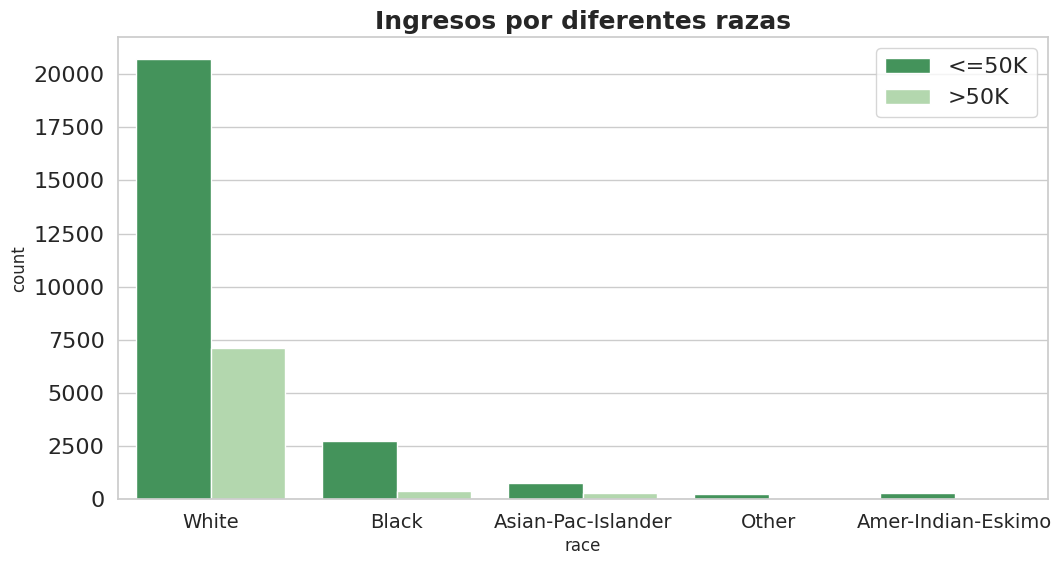

In [41]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

df_melted = df.melt(id_vars=['race'], value_vars=['income'])

sns.countplot(data=df_melted, x='race', hue='value', palette='Greens_r')
plt.title('Ingresos por diferentes razas', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Un punto importante que hay que tener en cuenta aquí es que, además de los blancos, hay muy pocas personas de otras razas. Por ello, es posible que no se note el porcentaje exacto y la relación de personas que ganan más de 50.000 dólares al año.

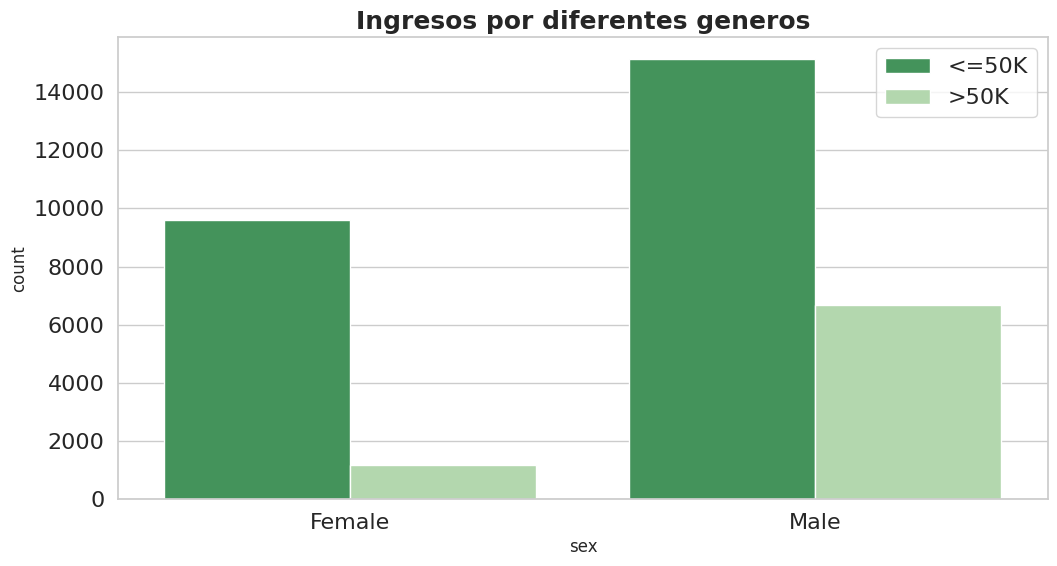

In [43]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

df_melted = df.melt(id_vars=['sex'], value_vars=['income'])

sns.countplot(data=df_melted, x='sex', hue='value', palette='Greens_r')
plt.title('Ingresos por diferentes generos', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Aquí podemos observar una brecha significativa en los ingresos entre hombres y mujeres.

*   En el caso de las mujeres, hay menos del 10 % de los adultos que ganan más de 50 000 dólares al año.
*   En el caso de los hombres, hay cerca del 33 % de ellos que ganan más de 50 000 dólares al año.

# **Implementación del modelo**

¡Ahora llegamos a la parte que finalmente me entusiasma!

*   Este cuaderno es especial para mí, ya que es la primera vez que intento implementar un modelo desde cero.

*   Aquí, usaré el modelo de regresión logística e intentaré crearlo desde cero.

*   Luego haré lo mismo usando el paquete Scikit-learn y veré si hay una diferencia importante en la precisión.

In [55]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [57]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

In [58]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [59]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [60]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [61]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [62]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1))
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):284.6857497692108 seconds
Learning rate: 0.1
Iteration: 100000


In [63]:
result = sigmoid(x, theta)

# **Implementación final:**

In [64]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


78.94720678111852

In [65]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)

print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using MLE):284.4887945652008seconds
Learning rate: 0.1
Iteration: 100000


In [66]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


78.15177666533583

**Regresión logística con MLE:**

Aquí, vemos que al implementar la regresión logística desde cero con la estimación de máxima verosimilitud, podemos lograr una precisión del 78,9 %.

Intentemos ahora importar Scikit Learn y comparemos nuestro modelo con la regresión logística incorporada del paquete.

In [67]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [68]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8016173610400246


In [69]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8033164440350069
2 0.8037770612620913
3 0.8076155381544603
4 0.7956394902502687
5 0.809765085214187
6 0.8002456625211116
7 0.8030093658836174
8 0.8030093658836174
9 0.8030093658836174
10 0.804544756640565
11 0.8036235221863964
12 0.8089973898357132
13 0.800706279748196
14 0.7999385843697221
15 0.800706279748196
16 0.8022416705051436
17 0.8042376784891755
18 0.8088438507600184
19 0.7965607247044373
20 0.806540764624597
21 0.8083832335329342
22 0.7950253339474896
23 0.7994779671426377
24 0.8000921234454169


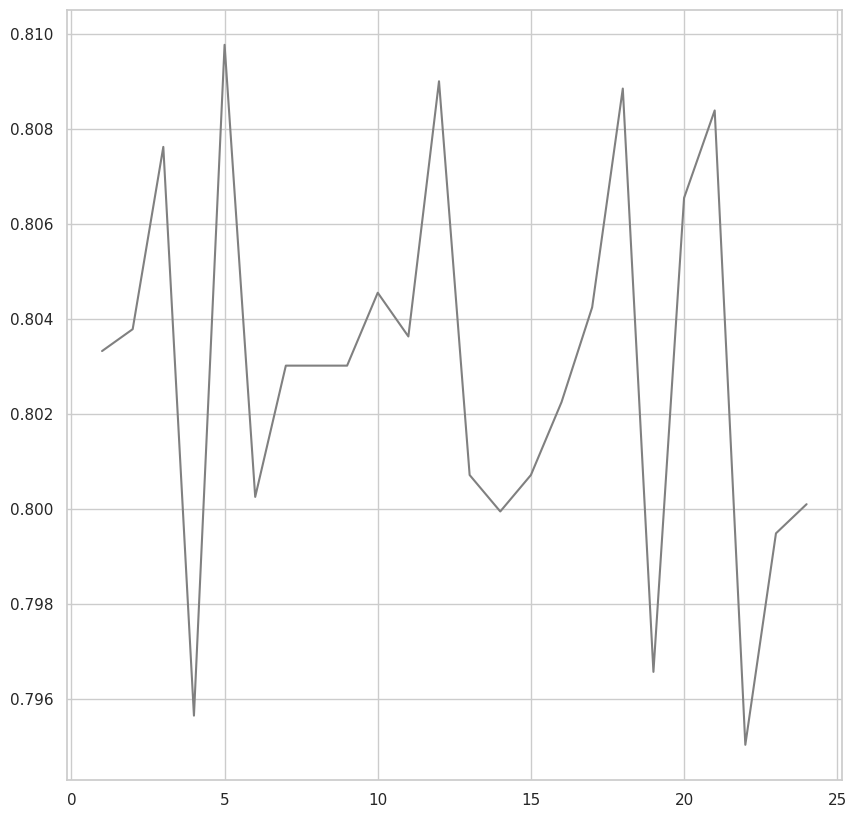

In [71]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='grey')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [72]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.809765085214187
0.8089973898357132
0.8088438507600184
0.8083832335329342


**Conclusión de la regresión logística:**

Vemos que la regresión logística con Sklearn nos da una precisión máxima del 80,9 %. Teniendo esto en cuenta, el modelo que preparamos desde cero no era tan malo en comparación con el que venía incorporado.


# **Analista de Datos Jonathan Lugo González**